In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import obonet
import BOCC
import pandas as pd
import numpy as np
import math
import typing
import seaborn as sns
import os

In [2]:
fixed_g_snow = pd.read_csv('../SnowballResultsFixed/snowball.paris.greedy.String_HPO_2020.phenotypic_branch.tsv',sep='\t')
fixed_w_snow = pd.read_csv('../SnowballResultsFixed/snowball.paris.walktrap.String_HPO_2020.phenotypic_branch.tsv',sep='\t')
fixed_i_snow = pd.read_csv('../SnowballResultsFixed/snowball.paris.infomap.String_HPO_2020.phenotypic_branch.tsv',sep='\t')
fixed_c_snow = pd.read_csv('../SnowballResultsFixed/snowball.paris.cesna.String_HPO_2020.phenotypic_branch.tsv',sep='\t')

g_snow = pd.read_csv('../SnowballResults/snowball.paris.greedy.String_HPO_2020.phenotypic_branch.tsv',sep='\t')
w_snow = pd.read_csv('../SnowballResults/snowball.paris.walktrap.String_HPO_2020.phenotypic_branch.tsv',sep='\t')
i_snow = pd.read_csv('../SnowballResults/snowball.paris.infomap.String_HPO_2020.phenotypic_branch.tsv',sep='\t')
c_snow = pd.read_csv('../SnowballResults/snowball.paris.cesna.String_HPO_2020.phenotypic_branch.tsv',sep='\t')

In [3]:
# get an empircal p value for each cluster
# com_id  com_score  replicate_id  replicate_score  rep_and_com_size
def empirical_p(df):
    res = {'com_id':[],'p-value':[],'com_score':[],'max_replicate_score':[]}
    for com_id in df['com_id'].unique():
        sub = df[df['com_id'] == com_id]
        obs_greater_than_expected_count = sum(sub['com_score'] > sub['replicate_score'])
        p = 1 - (obs_greater_than_expected_count / sub.shape[0])
        res['com_id'].append(com_id)
        res['p-value'].append(p)
        res['com_score'].append(list(sub['com_score'])[0])
        res['max_replicate_score'].append(sub['replicate_score'].max())
    return pd.DataFrame(res)


8
5
14
72


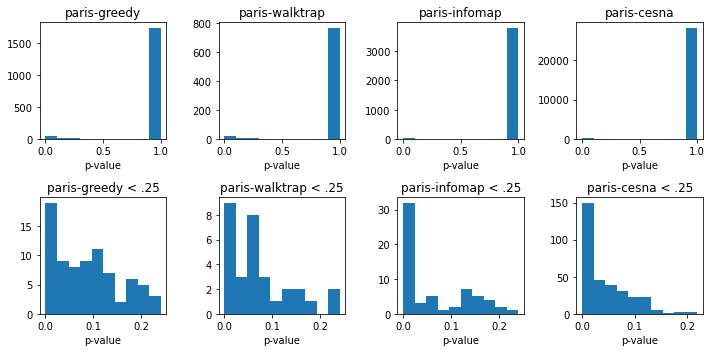

36
23
35
769


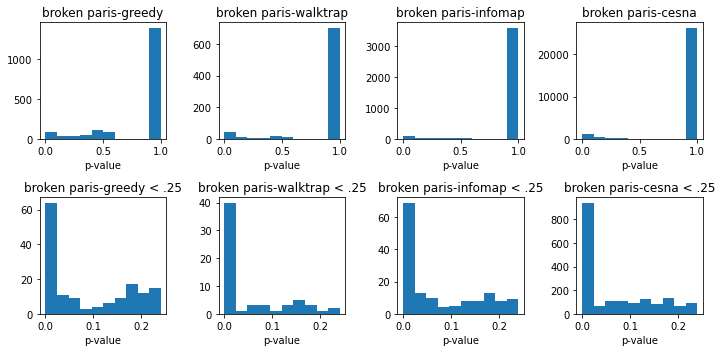

In [5]:
fixed_dfs = [fixed_g_snow,fixed_w_snow,fixed_i_snow,fixed_c_snow]
broken_dfs = [g_snow,w_snow,i_snow,c_snow]
fixed_algos = ['paris-greedy','paris-walktrap','paris-infomap','paris-cesna']
broken_algos = ['broken paris-greedy','broken paris-walktrap','broken paris-infomap','broken paris-cesna']

def plot_4dfs(dfs,algos,outputname):
    fig, axes = plt.subplots(2,4)
    fig.set_size_inches(10, 5)
    p_dfs = []
    for i,df,algo in zip(list(range(len(dfs))),dfs,algos):
        tmp_df = empirical_p(df)
        tmp_df['algo'] = algo
        p_dfs.append(tmp_df)
        axes[0][i].hist(tmp_df['p-value'])
        axes[1][i].hist(tmp_df[tmp_df['p-value'] < .25]['p-value'])
        axes[1][i].set_title(algo + ' < .25')
        axes[0][i].set_title(algo)
        axes[0][i].set_xlabel('p-value')
        axes[1][i].set_xlabel('p-value')
        print(sum(tmp_df['p-value'] == min(tmp_df['p-value'])))

    plt.tight_layout()
    plt.savefig(outputname)
    plt.show()
    return p_dfs

fixed_pdfs = plot_4dfs(fixed_dfs, fixed_algos, '../Figures/snowballing_fixed_pval_dist.png')
broken_pdfs = plot_4dfs(broken_dfs, broken_algos, '../Figures/snowballing_broken_pval_dist.png')

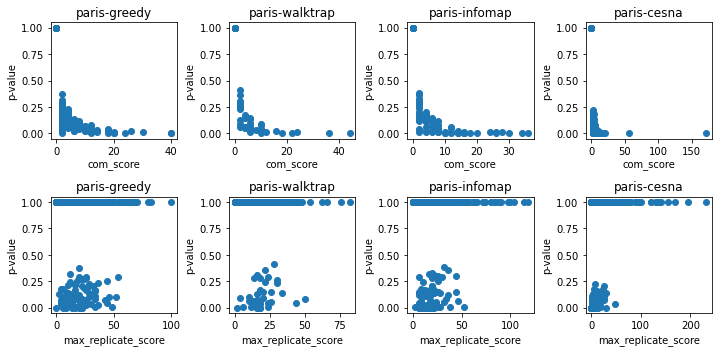

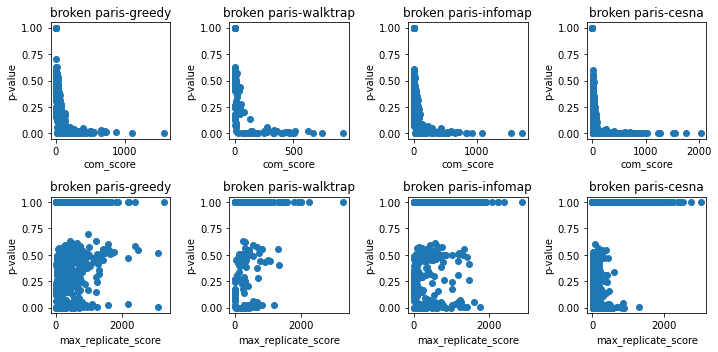

In [8]:
# scatter plot of
def scatter_plot_of_4dfs(dfs,algos,outputname):
    fig, axes = plt.subplots(2,4)
    fig.set_size_inches(10, 5)
    for i,df,algo in zip(list(range(len(dfs))),dfs,algos):
        axes[0][i].scatter(df['com_score'],df['p-value'])
        axes[1][i].scatter(df['max_replicate_score'],df['p-value'])
        axes[0][i].set_xlabel('com_score')
        axes[1][i].set_xlabel('max_replicate_score')
        axes[0][i].set_ylabel('p-value')
        axes[1][i].set_ylabel('p-value')
        axes[0][i].set_title(algo)
        axes[1][i].set_title(algo)
    plt.tight_layout()
    plt.savefig(outputname)
    plt.show()

fixed_pdfs = scatter_plot_of_4dfs(fixed_pdfs, fixed_algos, '../Figures/fixed_snowballing_score_vs_pval_scatter.png')
broken_pdfs = scatter_plot_of_4dfs(broken_pdfs, broken_algos, '../Figures/broken_snowballing_score_vs_pval_scatter.png')